In [3]:
# Import Required Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set default style for plots
sns.set(style="whitegrid")


In [4]:
# Load Stock Data
# can change 'AAPL' to 'RELIANCE.NS' or any stock 

ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-12-31')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,71.627100,72.681296,71.373226,72.620850,135480400
2020-01-03,71.847133,72.676462,71.689973,71.914833,146322800
2020-01-06,71.034717,72.526541,70.783256,72.487854,118387200
2020-01-07,72.497537,72.753831,71.926922,72.146950,108872000
2020-01-08,71.849548,73.609760,71.849548,73.307526,132079200


In [5]:
# Add Technical Indicators

# 20-day Simple Moving Average
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# RSI Calculation
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

data['RSI'] = compute_rsi(data)
data.dropna(inplace=True)
data.tail()


Price,Open,High,Low,Close,Volume,SMA_20,RSI
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2024-12-23,254.156919,255.034791,252.840088,254.655716,40858800,244.437349,73.865398
2024-12-24,254.875189,257.588630,254.675658,257.578674,23234700,245.700803,76.180677
2024-12-26,257.568678,259.474086,257.010028,258.396667,27237100,246.895920,76.812107
2024-12-27,257.209530,258.077462,252.451019,254.974930,42355300,247.926434,69.300680
2024-12-30,251.623005,252.889953,250.146571,251.593079,35557500,248.668145,58.382033


In [6]:
# Prepare Features and Target

features = ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'RSI']
target = 'Close'

X = data[features]
y = data[target].shift(-1)  # Predict next day's closing price

# Drop last row since y is NaN
X = X[:-1]
y = y[:-1]


In [7]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # no shuffle due to time-series
)


In [8]:
# Train the Model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


C:\Users\trive\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Mean Squared Error: 714.7794040419134
R² Score: -0.09696526245604664


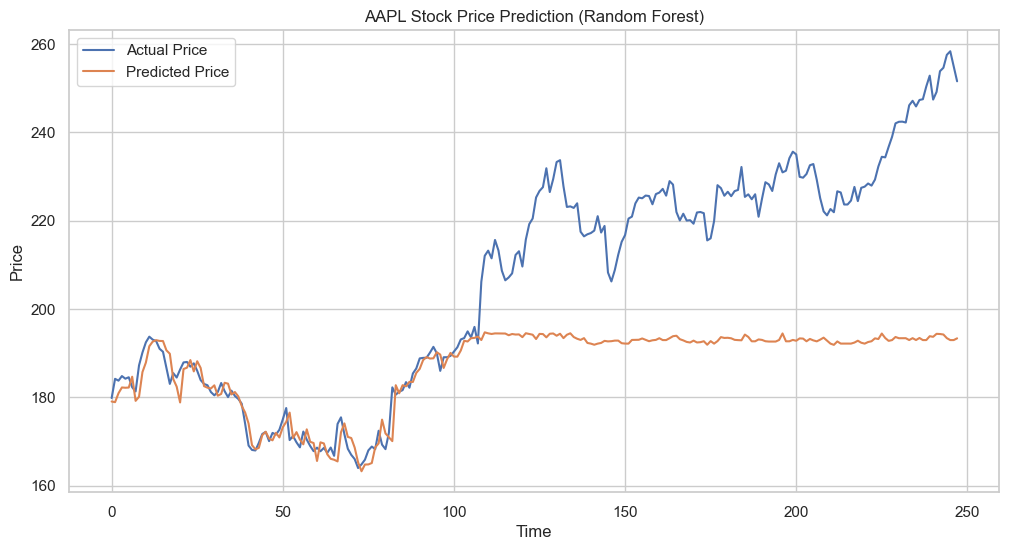

In [9]:
# Predict and Evaluate

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title(f"{ticker} Stock Price Prediction (Random Forest)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [10]:
# Predict the Next Day's Price

latest_input = X.iloc[-1].values.reshape(1, -1)
predicted_price = model.predict(latest_input)

print(f"📊 Predicted next closing price for {ticker}: ${predicted_price[0]:.2f}")


📊 Predicted next closing price for AAPL: $193.38
